Están a punto de entrar a un casino para apostar a la ruleta de la vida, su misión, **¡Ganarle a la casa!**

Dentro del casino prestan atención a todos los juegos, y descubren que hay una ruleta con 38 casillas y las siguientes reglas para jugar:

1.   Máximo pueden apostar 2,048 pesos
2.   No pueden a postar a todas las casillas a la vez
3.   Sólo pueden apostar a máximo 10 ruletas al mismo tiempo
4.   Si la canica cae en las casillas 1 o 2, todos pierden
4.   La ganancia es de 37 a 1, es decir, por cada peso apostado en una casilla ganadora, nos darán 37 pesos

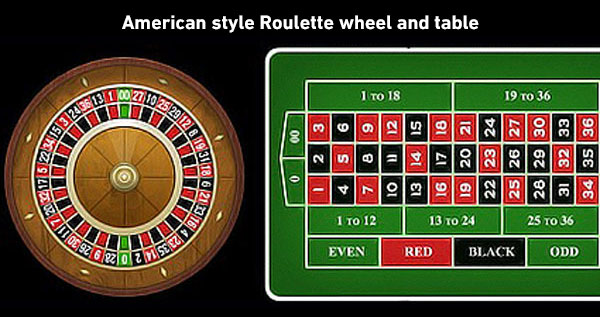

RETO: Usando las 10 ruletas y con todos los intentos que quieran, creén un método para ganar 1,000,000  empezando con 128.

Pista: Pueden elegir la cantidad apostada en cada juego. 

In [1]:
import random 

##### Solución

In [162]:
def num_ruletas(numero_ruletas):
  """
  Función diseñada para guardar un valor True/False dependiendo si se gano/perdio en la ronda anterior de una ruleta determinada. 
  Inicialmente cada ruleta inicia con el valor True.

  True=Ganar False=Perder

  Ejemplo: Si se juegan solo 2 ruletas, el return será:
  ruleta=[True,True]
  """
  ruleta=[]
  for i in range(numero_ruletas):
    ruleta.append(True)
  return ruleta

In [163]:
# Función para apuestas por ruleta
def num_ruletas_apuesta(numero_ruletas):
  """
  Función que guarda el valor inicial de x, el cual es el valor al cual se elevará la apuesta de base "2". Esta función crea una lista de longitud variable, en función de
  la cantidad de ruletas, en las que se rellena con ceros, dado que la apuesta inicial es $1 (2**0=1).
  
  Ejemplos: Si se juegan solo 2 ruletas, se iniciará la apuesta con un exponente x=0.
  x_apuesta=[0,0]
  """
  x_apuesta=[]
  for i in range(numero_ruletas):
    x_apuesta.append(0)
  return x_apuesta

In [172]:
# Función ruleta
def juego_ruleta(dinero_inicial, numero_ruletas):
    """
    Función que determina la cantidad de rondas necesarias para ganar 1,000,000 de pesos jugando un determinado número de ruletas al mismo tiempo,
    y con una cantidad de dinero_inicial. La función se detiene si se pierde todo el dinero, en dicho caso aparece el mensaje "P" (Perdedor), o si se cumple
    el objetivo inicial, en dicho caso aparece el mensaje "G" (Ganador).
  
    """
    rondas=0  #Conteo de las rondas para perder/ganar
    dinero_final=dinero_inicial   #Acumulado de la apuesta
    x=num_ruletas_apuesta(numero_ruletas) #Indicativo de la apuesta que va ir aumentando para recuperar la inversión en "n" rondas
    ruleta=num_ruletas(numero_ruletas) #Señala si la ronda anterior se gano o perdio
    
    while dinero_final<=1000000:

      for i in range(numero_ruletas):    #Indica que para ronda se repetirá el proceso para cada una de las ruletas establecidas.
        num_apostado=random.randint(0,37)  #Número aleatorio que se apostará en la ruleta[i]
        num_resultado=random.randint(0,37)   #Número aleatorio que saldrá en la ruleta[i]

        if ruleta[i]==False:   #Si en la ronda anterior se perdió en la ruleta[i] la apuesta dederá de elevarse para recuperar lo invertido.
          x[i]+=1
          if x[i]>11:    #Limite establecido en las reglas, no se puede apostar más de 2**11=2048.
            x[i]=0
        else:
          x[i]=0   #Valor base de la apuesta cuando se está ganando o se llega a apostar más de 2048. 2**0=1 de apuesta.

        apuesta=2**x[i]  #Valor de la apuesta definitiva en la ronda de la ruleta[i]
        dinero_final-=apuesta  #Resta de lo apostado con el acumulado
        
        if num_resultado==1 or num_resultado==2 or num_resultado!=num_apostado:   #Evento en el cual se pierde
          ruleta[i]=False
        else:                                       #Evento en el cual se gana
          dinero_final+=38*apuesta   
          ruleta[i]=True
          
      if dinero_final<=0:   #Saca del bucle y se declara que se perdió la partida.
        #print(f"Ya no cuentas con crédito suficiente para jugar, perdiste en la ronda: {rondas}.")
        break     
      
      rondas+=1  #Si el dinero final no está en números negativos, suma una ronda más al juego de la ruleta.
    
    if dinero_final>=1000000:    #Ganador del juego
      return f"G"
    else:
      return f"P"

  

In [177]:
juego_ruleta(128,10)

'P'

In [179]:
def probabilidad_ruleta(veces, dinero_inicial,numero_ruletas):
    """ 
    Función que determina los juegos ganados en la ruleta rusa despues de un número "veces" de intentos.
    Regresa la cantidad de veces ganadas y perdidas, y la correspondiente probabilidad de ganar.
    """
    resultados=[]
    vuelta=0
    while vuelta<veces:  #Repite el juego un determinado número de veces
        resultado=juego_ruleta(dinero_inicial,numero_ruletas)
        resultados.append(resultado)
        vuelta+=1
    perdidos=resultados.count("P")  #Cuenta las veces que se registro una partida perdida
    ganados=resultados.count("G")   #Cuenta las veces que se registro una partida ganada

    return f"El número de ganados es: {ganados} y el número de pérdidos es:{perdidos}. La probabilidad de ganar es de: {ganados/veces} %."
    

In [188]:
probabilidad_ruleta(1000,128,10)

'El número de ganados es: 0 y el número de pérdidos es:1000. La probabilidad de ganar es de: 0.0 %.'

In [189]:
probabilidad_ruleta(10000,128,10)

'El número de ganados es: 2 y el número de pérdidos es:9998. La probabilidad de ganar es de: 0.0002 %.'

In [190]:
probabilidad_ruleta(1000000,128,10)

'El número de ganados es: 92 y el número de pérdidos es:999908. La probabilidad de ganar es de: 9.2e-05 %.'

-----------------------------------------------------------------------------------------------------------------------
Sabrina Contreras